In [2]:
import pandas as pd
import numpy as np

In [4]:
x = np.full((50), 0)
x[30] = 1
x

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [12]:
df = pd.DataFrame(data=x)
df.columns = ["LCT"]
df

,LCT
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [8]:
from statsmodels.stats.proportion import proportion_confint

In [13]:
normal_interval = proportion_confint(sum(df.LCT), len(df.LCT), method = 'normal')
print('normal_interval [%f, %f] with width %f' % (normal_interval[0],
                                                  normal_interval[1], 
                                                  normal_interval[1] - normal_interval[0]))

normal_interval [-0.018805, 0.058805] with width 0.077611


In [14]:
normal_interval = proportion_confint(sum(df.LCT), len(df.LCT), method = 'wilson')
print('normal_interval [%f, %f] with width %f' % (normal_interval[0],
                                                  normal_interval[1], 
                                                  normal_interval[1] - normal_interval[0]))

normal_interval [0.003539, 0.104954] with width 0.101415


In [15]:
from statsmodels.stats.proportion import samplesize_confint_proportion
n_samples = int(np.ceil(samplesize_confint_proportion(df.LCT.mean(), 0.01)))
n_samples

753

Populating the interactive namespace from numpy and matplotlib


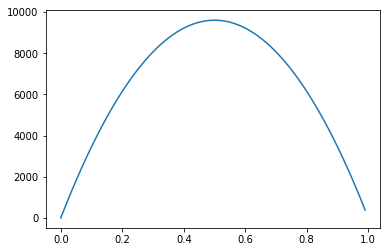

In [18]:
p = np.arange(0, 1, 0.01)
n = [int(np.ceil(samplesize_confint_proportion(i, 0.01))) for i in p]
import matplotlib.pyplot as plt
%pylab inline
plt.plot(p, n)

In [21]:
p_max = p[n.index(np.max(n))]
p_max

0.5

In [22]:
int(np.ceil(samplesize_confint_proportion(p_max, 0.01)))

9604